# Volcano plot

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [276]:
def volcano(path_human,path_mouse,cell_type,complement_list,innate_list):
    bathuman = pd.read_excel(path_h, sheet_name=cell_type,index_col='Unnamed: 0.1')
    batmouse = pd.read_excel(path_m, sheet_name=cell_type,index_col='Unnamed: 0.1')

    lowest_non_zero = bathuman.loc[bathuman['p_val_adj'] != 0, 'p_val_adj'].min()
    bathuman.loc[bathuman['p_val_adj'] == 0, 'p_val_adj'] = lowest_non_zero
    lowest_non_zero = batmouse.loc[batmouse['p_val_adj'] != 0, 'p_val_adj'].min()
    batmouse.loc[batmouse['p_val_adj'] == 0, 'p_val_adj'] = lowest_non_zero

    batmouse['-log(Q-value)'] = -np.log10(batmouse.p_val_adj)
    bathuman['-log(Q-value)'] = -np.log10(bathuman.p_val_adj)
    batmouse.rename(columns={'avg_log2FC':'log2FC'},inplace=True)
    bathuman.rename(columns={'avg_log2FC':'log2FC'},inplace=True)

    complement_h = [i for i in complement if i in bathuman.index]
    complement_m = [i for i in complement if i in batmouse.index]
    innate_h =[i for i in GENES if i in bathuman.index]
    innate_m =[i for i in GENES if i in batmouse.index]
    
    
    for species in ['human','mouse']:
        if species == 'human':
            subset1_indices = complement_h
            subset2_indices = innate_h
            df = bathuman
        else:
            subset1_indices = complement_m
            subset2_indices = innate_m
            df = batmouse
        # Sample subsets (lists of indices)

        plt.figure(figsize=(8, 5))

        sns.scatterplot(data=df, x='log2FC', y='-log(Q-value)', color='#A9A9A9', label='All genes',edgecolor='none')

        # Plot points in subset2 with blue
        subset2_df = df.loc[subset2_indices]
        sns.scatterplot(data=subset2_df, x='log2FC', y='-log(Q-value)', color='#944dff', label='Innate immune',edgecolor='none')

        # Filter the significant points for subset1 and plot them in red
        subset1_df = df.loc[subset1_indices]
        sns.scatterplot(data=subset1_df, x='log2FC', y='-log(Q-value)', color='#ff471a', label='Complement',edgecolor='none')

        # Annotate points in subset1 with their corresponding names (using DataFrame index)
        for gene_name in subset1_indices:
            plt.text(subset1_df.loc[gene_name, 'log2FC'], subset1_df.loc[gene_name, '-log(Q-value)'], gene_name,
                     ha='left', va='bottom', fontsize=13, color='black')
        
        max_abs_value = max(abs(df['log2FC']))
        plt.xlim(-max_abs_value-0.5, max_abs_value+0.5)

        # Set plot labels and title
        plt.xlabel('log2FC')
        plt.ylabel('-log(Q-value)')
        plt.title( cell_type+ '- R.aegyptus vs '+species)

        # Show legend
        plt.legend()

        # Show the plot
        plt.tight_layout()
        plt.savefig(species+'_'+cell_type+".pdf",bbox_inches='tight')
        plt.show()

In [2]:
innateDB= pd.read_csv(r"innate_egnnog_names.csv",index_col=0)
innateDB =  list(innateDB.index)
complement = ['MASP1', 'MASP2', 'C2', 'CFB', 'CFD', 'CFI','C3','C4A','C5','C6','C7','C8A','C8B','C8G','C9']
# complement = [ 'C2', 'CFB', 'CFD', 'CFI','C3','C4A','C5','C6','C7','C8G','C9']

# Gut

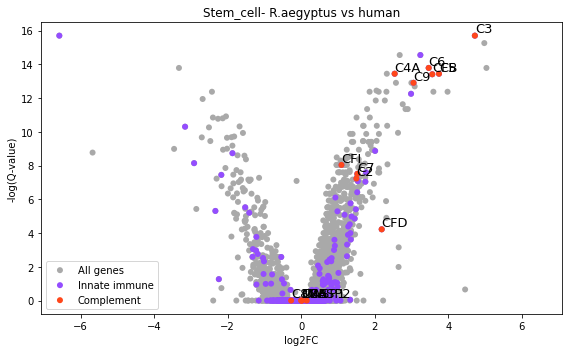

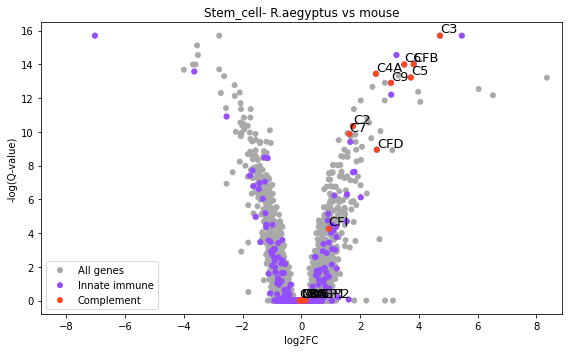

In [277]:
path_m = r"bat_mouse_gut_no_limit_DE.xlsx"
path_h = r"bat_human_gut_no_limit_DE.xlsx"
volcano(path_h,path_m,'Stem_cell',complement,innateDB)

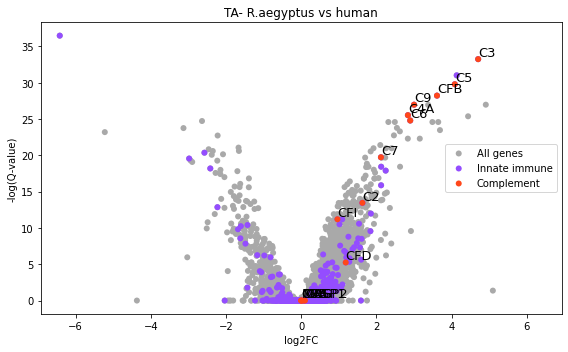

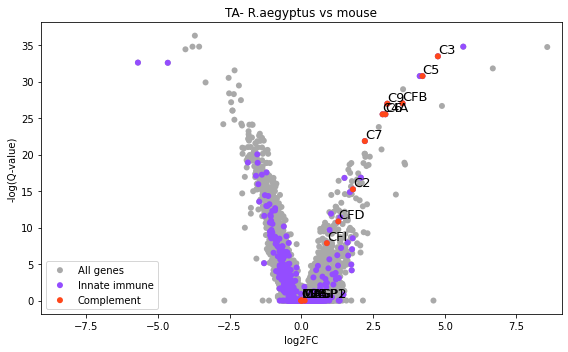

In [270]:
#Gut
path_m = r"bat_mouse_gut_no_limit_DE.xlsx"
path_h = r"bat_human_gut_no_limit_DE.xlsx"
volcano(path_h,path_m,'TA',complement,innateDB)

In [19]:
def save_excel(excel,sheet_names=['R.aegyptiacus - Human','R.aegyptiacus - Mouse']):
    writer = pd.ExcelWriter('Innate_DB_DE_gut.xlsx', engine='xlsxwriter')
    for sheet in sheet_names:
        excel[sheet].to_excel(writer,sheet_name=sheet)

    writer.close()
    
path_m = r"bat_mouse_gut_no_limit_DE.xlsx"
path_h = r"bat_human_gut_no_limit_DE.xlsx"

bathuman = pd.read_excel(path_h, sheet_name='Stem_cell',index_col='Unnamed: 0.1')
batmouse = pd.read_excel(path_m, sheet_name='Stem_cell',index_col='Unnamed: 0.1')

bathuman = bathuman.loc[innateDB]
batmouse = batmouse.loc[innateDB]

excel = {'R.aegyptiacus - Human':bathuman,'R.aegyptiacus - Mouse':batmouse}


save_excel(excel,['R.aegyptiacus - Human','R.aegyptiacus - Mouse'])

# Lung

In [265]:
innateDB= pd.read_csv(r"innate_egnnog_names.csv",index_col=0)
innateDB =  list(innateDB.index)
complement = ['MASP1', 'MASP2', 'C2', 'CFB', 'CFD', 'CFI','C3','C4A','C5','C6','C7','C8A','C8B','C8G','C9']
# complement = [ 'C2', 'CFB', 'CFD', 'CFI','C3','C4A','C5','C6','C7','C8G','C9']

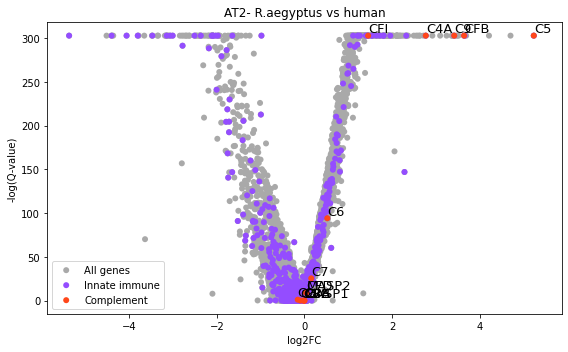

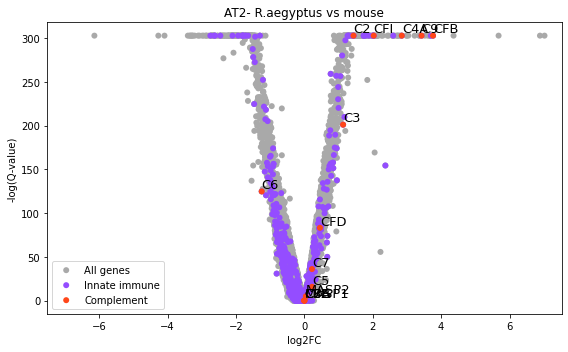

In [278]:
#lung
path_m = r"bat_mouse_lung_no_limit_DE.xlsx"
path_h = r"bat_human_lung_no_limit_DE.xlsx"
volcano(path_h,path_m,'AT2',complement,innateDB)

In [17]:
def save_excel(excel,sheet_names=['R.aegyptiacus - Human','R.aegyptiacus - Mouse']):
    writer = pd.ExcelWriter('Innate_DB_DE_lungs.xlsx', engine='xlsxwriter')
    for sheet in sheet_names:
        excel[sheet].to_excel(writer,sheet_name=sheet)

    writer.close()
    
path_m = r"bat_mouse_lung_no_limit_DE.xlsx"
path_h = r"bat_human_lung_no_limit_DE.xlsx"

bathuman = pd.read_excel(path_h, sheet_name='AT2',index_col='Unnamed: 0.1')
batmouse = pd.read_excel(path_m, sheet_name='AT2',index_col='Unnamed: 0.1')

bathuman = bathuman.loc[innateDB]
batmouse = batmouse.loc[innateDB]

excel = {'R.aegyptiacus - Human':bathuman,'R.aegyptiacus - Mouse':batmouse}


save_excel(excel,['R.aegyptiacus - Human','R.aegyptiacus - Mouse'])